# SGD Classifier
---
- Logistic Regression에 SGD 경사 하강법을 적용한 모델
- 필수 설정 파라미터
    * loss pram: 이진/다중 손실함수 이름 지정

## [1] 데이터 정리

In [42]:
#모듈 로딩
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [43]:
# 경고 무시
import warnings
warnings.filterwarnings(action = "ignore")

In [44]:
# 파일 가져오기
import os
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab Notebooks/python_advanced_ai/machine_learning/D_0902

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/python_advanced_ai/machine_learning/D_0902


In [45]:
fish = pd.read_csv("../Data/fish.csv")

In [46]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [47]:
# input, target 데이터 분리
fish_input = fish[fish.columns[1:]].to_numpy()

fish_target = fish[fish.columns[0]].to_numpy()

In [48]:
# 학습용, 테스트용 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [49]:
# 표준화 평균0, 표준편차 1
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## [2] 모델 생성 및 학습

In [50]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(
    loss = "log",
    max_iter = 10,
    random_state = 42
)

# 학습 진행 fit(): 반복 횟수 즉 max_iter 만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [51]:
print("train score: ", sc.score(train_scaled, train_target))
print("test score: ", sc.score(test_scaled, test_target))

train score:  0.773109243697479
test score:  0.775


In [52]:
# partial_fit() = 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target)

print("train score: ", sc.score(train_scaled, train_target))
print("test score: ", sc.score(test_scaled, test_target))

train score:  0.8151260504201681
test score:  0.85


## [3] 학습 횟수(epoch)와 과/소 적합

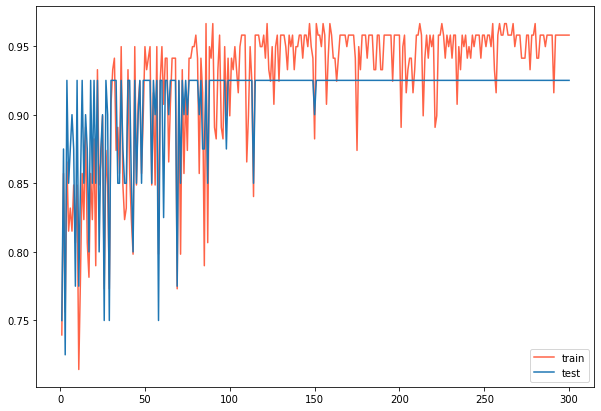

In [57]:
import matplotlib.pyplot as plt

sc_1 = SGDClassifier(
    loss = "log",
    max_iter = 10,
)

sc_1.fit(train_scaled, train_target)

train = []
test = []

for _ in range(1,301):
    sc_1.partial_fit(train_scaled, train_target)
    train.append(sc_1.score(train_scaled, train_target))
    test.append(sc_1.score(test_scaled, test_target))


plt.figure(figsize = (10, 7))
plt.plot(range(1, 301), train, color = "tomato", label = "train")
plt.plot(range(1, 301), test, label = "test")
plt.legend(loc = 4)
plt.show()

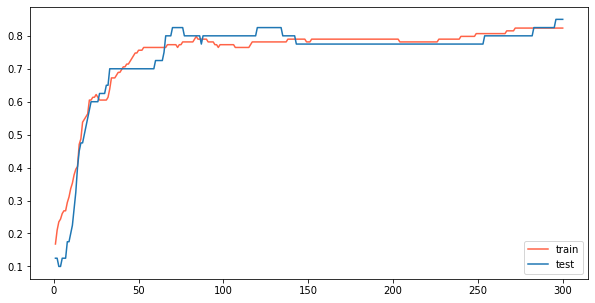

In [58]:
sc_2 = SGDClassifier(
    loss = "log",
    random_state = 42
)

sc_2.fit(train_input, train_target)

train = []
test = []

classes = np.array(list(set(train_target)))

for _ in range(1,301):
    sc_2.partial_fit(train_scaled, train_target, classes = classes)
    train.append(sc_2.score(train_scaled, train_target))
    test.append(sc_2.score(test_scaled, test_target))


plt.figure(figsize = (10, 5))
plt.plot(range(1, 301), train, color = "tomato", label = "train")
plt.plot(range(1, 301), test, label = "test")
plt.legend(loc = 4)
plt.show()

In [69]:
# early_stopping: 조기종료 여부
# n_iter_no_change: n번 동안 변경 되지 않은 경우
# tol: 성능 개선의 기준값

sc_3 = SGDClassifier(
    loss = "log",
    tol = 1.0,
    random_state = 42,
    n_iter_no_change = 10,
    early_stopping=True
)

sc_3.fit(train_scaled, train_target)

print(sc_3.score(train_scaled, train_target))
print(sc_3.score(test_scaled, test_target))
print(sc_3.n_iter_)

0.8319327731092437
0.875
11


In [71]:
sc_4 = SGDClassifier(
    loss = "log",
    random_state = 42,
    tol = None,
    max_iter = 2000
)

sc_4.fit(train_scaled, train_target)
print(sc_4.score(train_scaled, train_target))
print(sc_4.score(test_scaled, test_target))
print(sc_4.n_iter_)

0.957983193277311
0.925
2000
